In [1]:
# import useful libraries
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read one of the test images
img = cv2.imread('./test_imgs/james_test3.jpg')

# check shape
img.shape

(2048, 1365, 3)

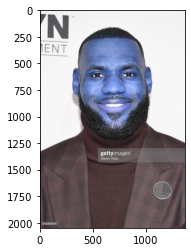

In [3]:
# show loaded image
plt.imshow(img)

In [4]:
# changing image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray.shape

(2048, 1365)

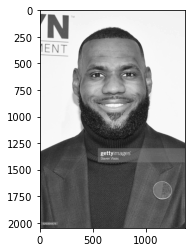

In [5]:
# show grayscale image
plt.imshow(gray, cmap='gray')

### Face detection using Haar Feature-based Cascade Classifier

In [6]:
# face detection using OpenCV CascadeClassifier class with pretrained models
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[315, 303, 765, 765]], dtype=int32)

In [7]:
# store rectangle into x, y, w, h
(x, y, w, h) = faces[0]
x, y, w, h

(315, 303, 765, 765)

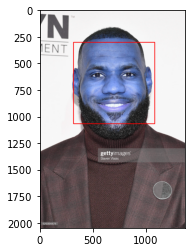

In [8]:
# draw rectangle around detected face
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)

plt.imshow(face_img)

In [9]:
# eye detection using OpenCV CascadeClassifier class with pretrained models
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

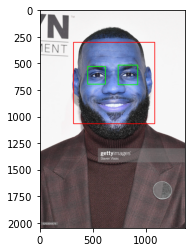

In [10]:
cv2.destroyAllWindows
for x, y, w, h in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)
    # roi = 'region of interest' --> face region
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w] 
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for ex, ey, ew, eh in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 5)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

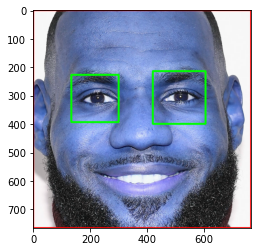

In [11]:
# plot cropped image of the face
plt.imshow(roi_color, cmap='gray')

In [16]:
# function that takes an image as an input and returns cropped face only if two eyes are detected
def get_cropped_img_if_2_eyes(image_path):
    """This function takes an image as an input and returns cropped image of face region only if
    two eyes are detected on an image. If one eye is detected function returns None."""
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes)>=2:
            return roi_color        

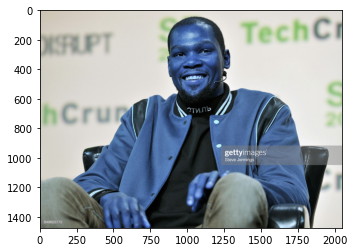

In [14]:
# load test image with normal face
img_test = cv2.imread('./test_imgs/durant_test4.jpg')

plt.imshow(img_test)

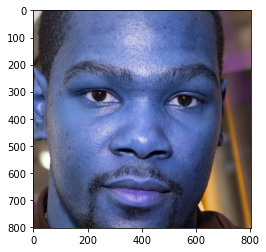

In [22]:
# test function; should return cropped face
cropped_normal = get_cropped_img_if_2_eyes('./test_imgs/durant_test2.jpg')

plt.imshow(cropped_normal)

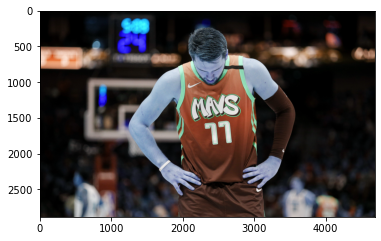

In [30]:
# load test image with obscured face
img_test_obsc = cv2.imread('./test_imgs/doncic_test5.jpg')

plt.imshow(img_test_obsc)

In [29]:
# test function; should return none
cropped_obscured = get_cropped_img_if_2_eyes('./test_imgs/doncic_test5.jpg')

cropped_obscured

In [31]:
# define paths
path_to_data = './dataset/'
path_to_cropped_data = './dataset/cropped/'

In [33]:
# save paths of subdirectiories to a list
import os

img_directories = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_directories.append(entry.path)

In [34]:
img_directories

['./dataset/giannis_antetokounmpo',
 './dataset/joel_embiid',
 './dataset/kevin_durant',
 './dataset/lebron_james',
 './dataset/luka_doncic',
 './dataset/stephen_curry']

In [36]:
# make 'cropped' directory if it doesn't exist
import shutil

if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [42]:
cropped_img_directories = [] # folders that contain cropped images of players faces

player_file_names_dict = {}

for img_dir in img_directories:
    count = 1
    player_name = img_dir.split('/')[-1]
    print(player_name)
    
    player_file_names_dict[player_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + player_name
            
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_directories.append(cropped_folder)
                print('Generating cropped images in folder: ', cropped_folder)
                
            cropped_file_name = player_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            player_file_names_dict[player_name].append(cropped_file_path)
            count += 1

giannis_antetokounmpo
Generating cropped images in folder:  ./dataset/cropped/giannis_antetokounmpo
joel_embiid
Generating cropped images in folder:  ./dataset/cropped/joel_embiid
kevin_durant
Generating cropped images in folder:  ./dataset/cropped/kevin_durant
lebron_james
Generating cropped images in folder:  ./dataset/cropped/lebron_james
luka_doncic
Generating cropped images in folder:  ./dataset/cropped/luka_doncic
stephen_curry
Generating cropped images in folder:  ./dataset/cropped/stephen_curry


In [56]:
# rebuild dictionary because of manually deleted cropped images
player_file_names_dict = {}
for img_dir in cropped_img_directories:
    player_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    player_file_names_dict[player_name] = file_list

In [57]:
player_file_names_dict

{'giannis_antetokounmpo': ['./dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo1.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo10.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo11.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo12.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo13.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo14.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo15.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo16.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo17.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo18.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo19.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo2.png',
  './dataset/cropped/giannis_antetokounmpo\\giannis_antetokounmpo20.png',
  './dataset/cr

In [51]:
# wavelet transformation function
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray, cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

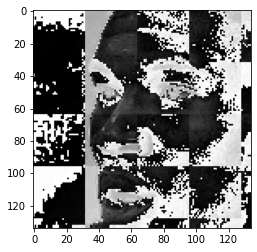

In [54]:
# test wavelet transformation
img_haar_test = cv2.imread('./dataset/cropped/giannis_antetokounmpo/giannis_antetokounmpo1.png')

img_haar = w2d(img_haar_test, 'db1', 5)

plt.imshow(img_haar, cmap='gray')

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier.

In [48]:
# assign number to each player name 
class_dict = {}
count = 0
for player_name in player_file_names_dict.keys():
    class_dict[player_name] = count
    count = count + 1
class_dict

{'giannis_antetokounmpo': 0,
 'joel_embiid': 1,
 'kevin_durant': 2,
 'lebron_james': 3,
 'luka_doncic': 4,
 'stephen_curry': 5}

In [58]:
X, y = [], []
for player_name, train_files in player_file_names_dict.items():
    for train_img in train_files:
        img = cv2.imread(train_img)
        scalled_img = cv2.resize(img, (32, 32))
        img_haar = w2d(img,'db1',5)
        scalled_img_haar = cv2.resize(img_haar, (32, 32))
        combined_img = np.vstack((scalled_img.reshape(32*32*3,1),scalled_img_haar.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[player_name])

In [59]:
# size of each image (should be: 32*32*3 + 32*32 = 4096)
len(X[0])

4096

In [60]:
X[0]

array([[  5],
       [  3],
       [  3],
       ...,
       [237],
       [242],
       [  2]], dtype=uint8)

In [62]:
# reshape X and convert to float
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(200, 4096)

In [64]:
# check
X[0]

array([  5.,   3.,   3., ..., 237., 242.,   2.])

### Training the model 

In [65]:
# import useful modules
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [66]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [67]:
# create sklearn pipeline (1st: scale our data first using StandardScaler() or MinMaxScaler(); 2nd: create SVC model)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7

In [68]:
# classification report
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.75      0.75         8
           2       0.00      0.00      0.00         4
           3       0.45      1.00      0.62         5
           4       0.80      0.86      0.83        14
           5       0.62      0.56      0.59         9

    accuracy                           0.70        50
   macro avg       0.58      0.64      0.59        50
weighted avg       0.68      0.70      0.68        50



C:\Users\Korisnik\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
# GridSearch to find best performing model and best hyperparameters
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [71]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.753333,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.580000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.786667,{'logisticregression__C': 1}


In [75]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [72]:
best_estimators['svm'].score(X_test,y_test)

0.7

In [73]:
best_estimators['random_forest'].score(X_test,y_test)

0.56

In [74]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.88

Logistic regression gave the best score so we will use this model.

In [82]:
# save best classifier into a variable
best_clf = best_estimators['logistic_regression']

In [83]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  0,  1,  0,  0],
       [ 0,  7,  1,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  1],
       [ 1,  0,  0,  0, 13,  0],
       [ 0,  0,  1,  0,  0,  8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

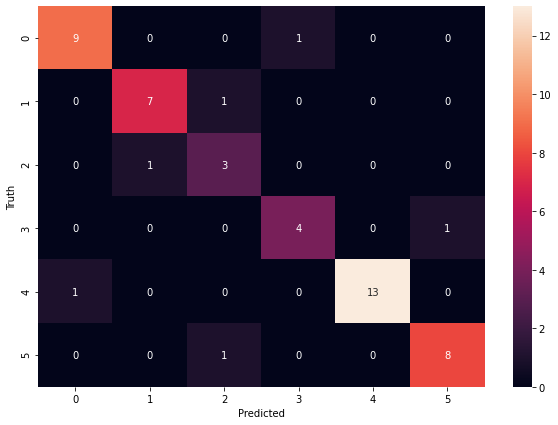

In [84]:
# plot confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Save trained model

In [85]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'model.pkl')

['model.pkl']

### Save class dictionary

In [86]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))